# Python protobuf test

In [4]:
from software.proto.repeated_any_msg_pb2 import RepeatedAnyMsg
from software.proto.sensor_msg_pb2 import SensorProto
from software.proto import sensor_msg_pb2
from google.protobuf.any_pb2 import Any
from google.protobuf.internal.decoder import _DecodeVarint32
import numpy as np
import matplotlib.pyplot as plt
import os
from python_tools.proto_log import ProtoLog
from python_tools.sensor_proto_log import SensorProtoLog

In [5]:
proto_log = ProtoLog('/home/jordan/protologgertest/SensorProto/', SensorProto)
sensor_msg = proto_log[50]
fields = list(sensor_msg._fields)
sensor_msg.ListFields()[0][0].name

Loaded 11 RepeatedAnyMsg chunks


'ssl_vision_msg'

In [6]:
sensor_proto_log = SensorProtoLog('/home/jordan/protologgertest/SensorProto/')

Loaded 11 RepeatedAnyMsg chunks
['Loaded 6600 messages of field ssl_vision_msg', 'Loaded 4400 messages of field ssl_referee_msg']


Text(0.5, 1.0, 'Ball positions')

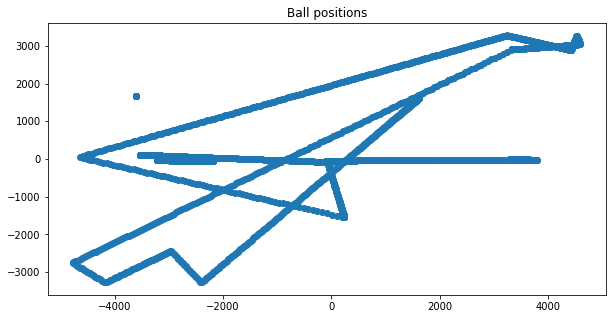

In [7]:
ball_xs = []
ball_ys = []

for vision in sensor_proto_log.ssl_vision_msg: 
    if vision.HasField("detection") and len(vision.detection.balls) > 0:
        ball_xs.extend([ball.x for ball in vision.detection.balls])
        ball_ys.extend([ball.y for ball in vision.detection.balls])
        
plt.figure(figsize=(10, 5))
plt.scatter(ball_xs, ball_ys)
plt.title("Ball positions")